<a href="https://colab.research.google.com/github/karthikasi/Task-7/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [32]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [33]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [34]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

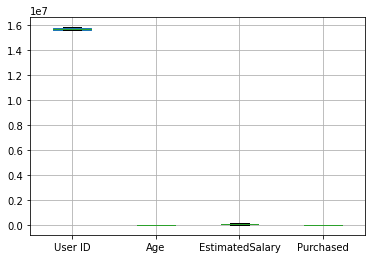

In [35]:
df.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


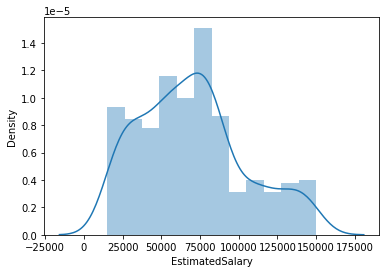

In [36]:
sns.distplot(df['EstimatedSalary'])

In [37]:
#from sklearn.preprocessing import LabelEncoder
#labeled=LabelEncoder()
#df["Gender"]=labeled.fit_transform(df["Gender"])
df['Gender']=df.Gender.map({'Male':0,'Female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [38]:
X=df[["Age","EstimatedSalary","Gender"]].values
y=df["Purchased"].values

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

**Feature Scaling**

In [40]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train,y_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [42]:
y_pred=dt.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

**Predicting the Test set results**

In [44]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [62]:
dt.predict_proba(X_test_scaled)

array([[1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. ,

**Making the Confusion Matrix**

array([[39,  9],
       [ 9, 23]])

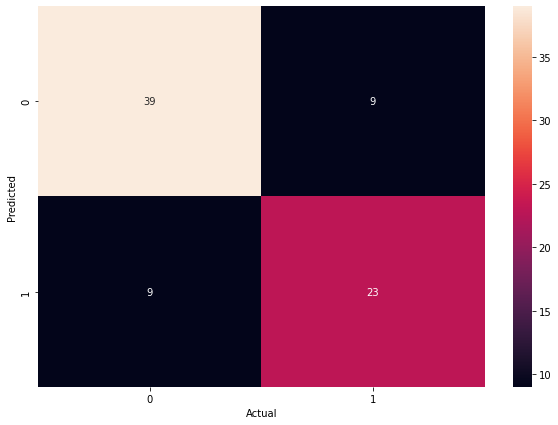

In [46]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
confusion_matrix(y_test,y_pred)

Test set accuracy: 0.78
Test set auc: 0.77
Train set AUC :  0.9954954954954955


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


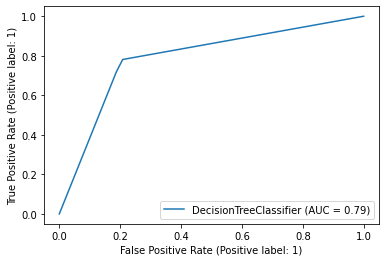

In [47]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test_scaled) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test_scaled, y_test)


acc = roc_auc_score(y_train, dt.predict(X_train_scaled))
print("Train set AUC : ", acc)

**Visualising the Training set results**

[Text(0.48355263157894735, 0.9642857142857143, 'X[0] <= 0.708\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.27631578947368424, 0.8928571428571429, 'X[1] <= 0.656\ngini = 0.275\nsamples = 237\nvalue = [198, 39]'),
 Text(0.15789473684210525, 0.8214285714285714, 'X[0] <= -0.072\ngini = 0.067\nsamples = 201\nvalue = [194, 7]'),
 Text(0.13157894736842105, 0.75, 'gini = 0.0\nsamples = 134\nvalue = [134, 0]'),
 Text(0.18421052631578946, 0.75, 'X[1] <= 0.45\ngini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.15789473684210525, 0.6785714285714286, 'X[1] <= -0.023\ngini = 0.142\nsamples = 65\nvalue = [60, 5]'),
 Text(0.13157894736842105, 0.6071428571428571, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.18421052631578946, 0.6071428571428571, 'X[1] <= 0.065\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.15789473684210525, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21052631578947367, 0.5357142857142857, 'X[0] <= 0.318\ngini = 0.238\nsa

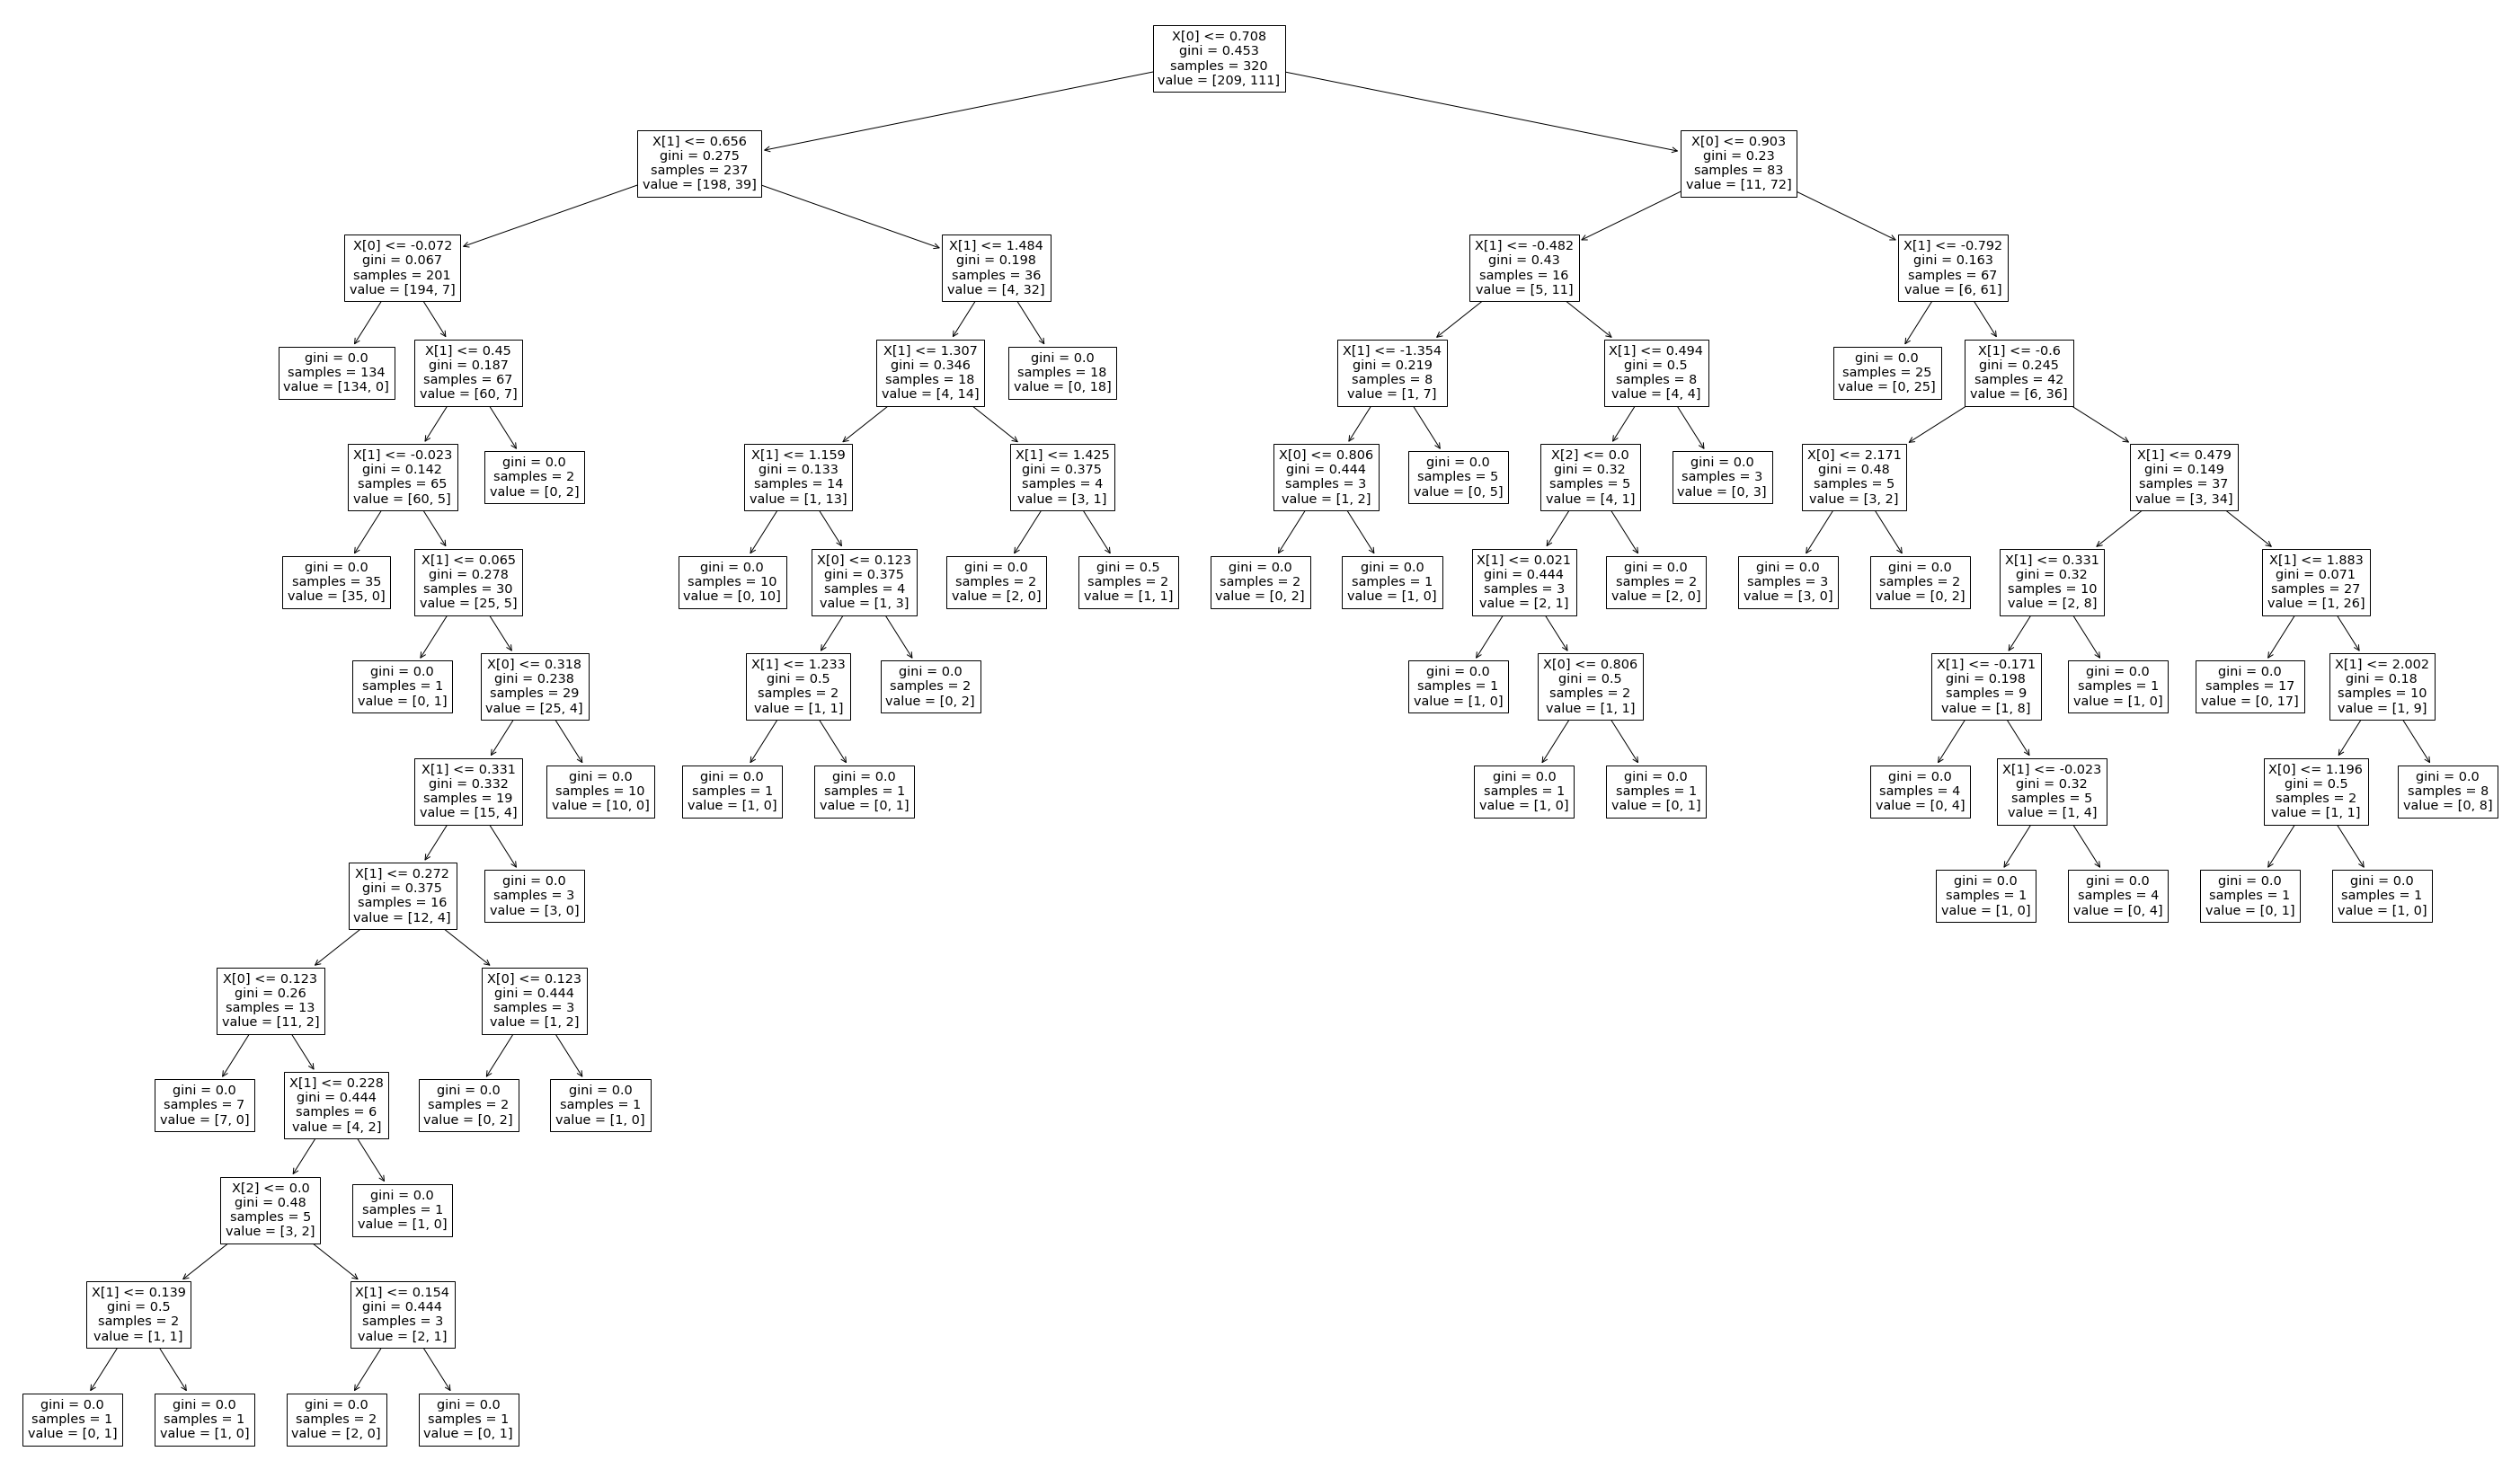

In [54]:
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(dt) # dt is the decison tree that I have learnt

**Visualising the Test set results**

In [56]:
feature_names=np.array(X_train_scaled)
target_names=np.array(y)
feature_names_test=np.array(X_test_scaled)

In [57]:
feature_names=feature_names.astype('str')
target_names=target_names.astype('str')
feature_names_test=feature_names_test.astype('str')

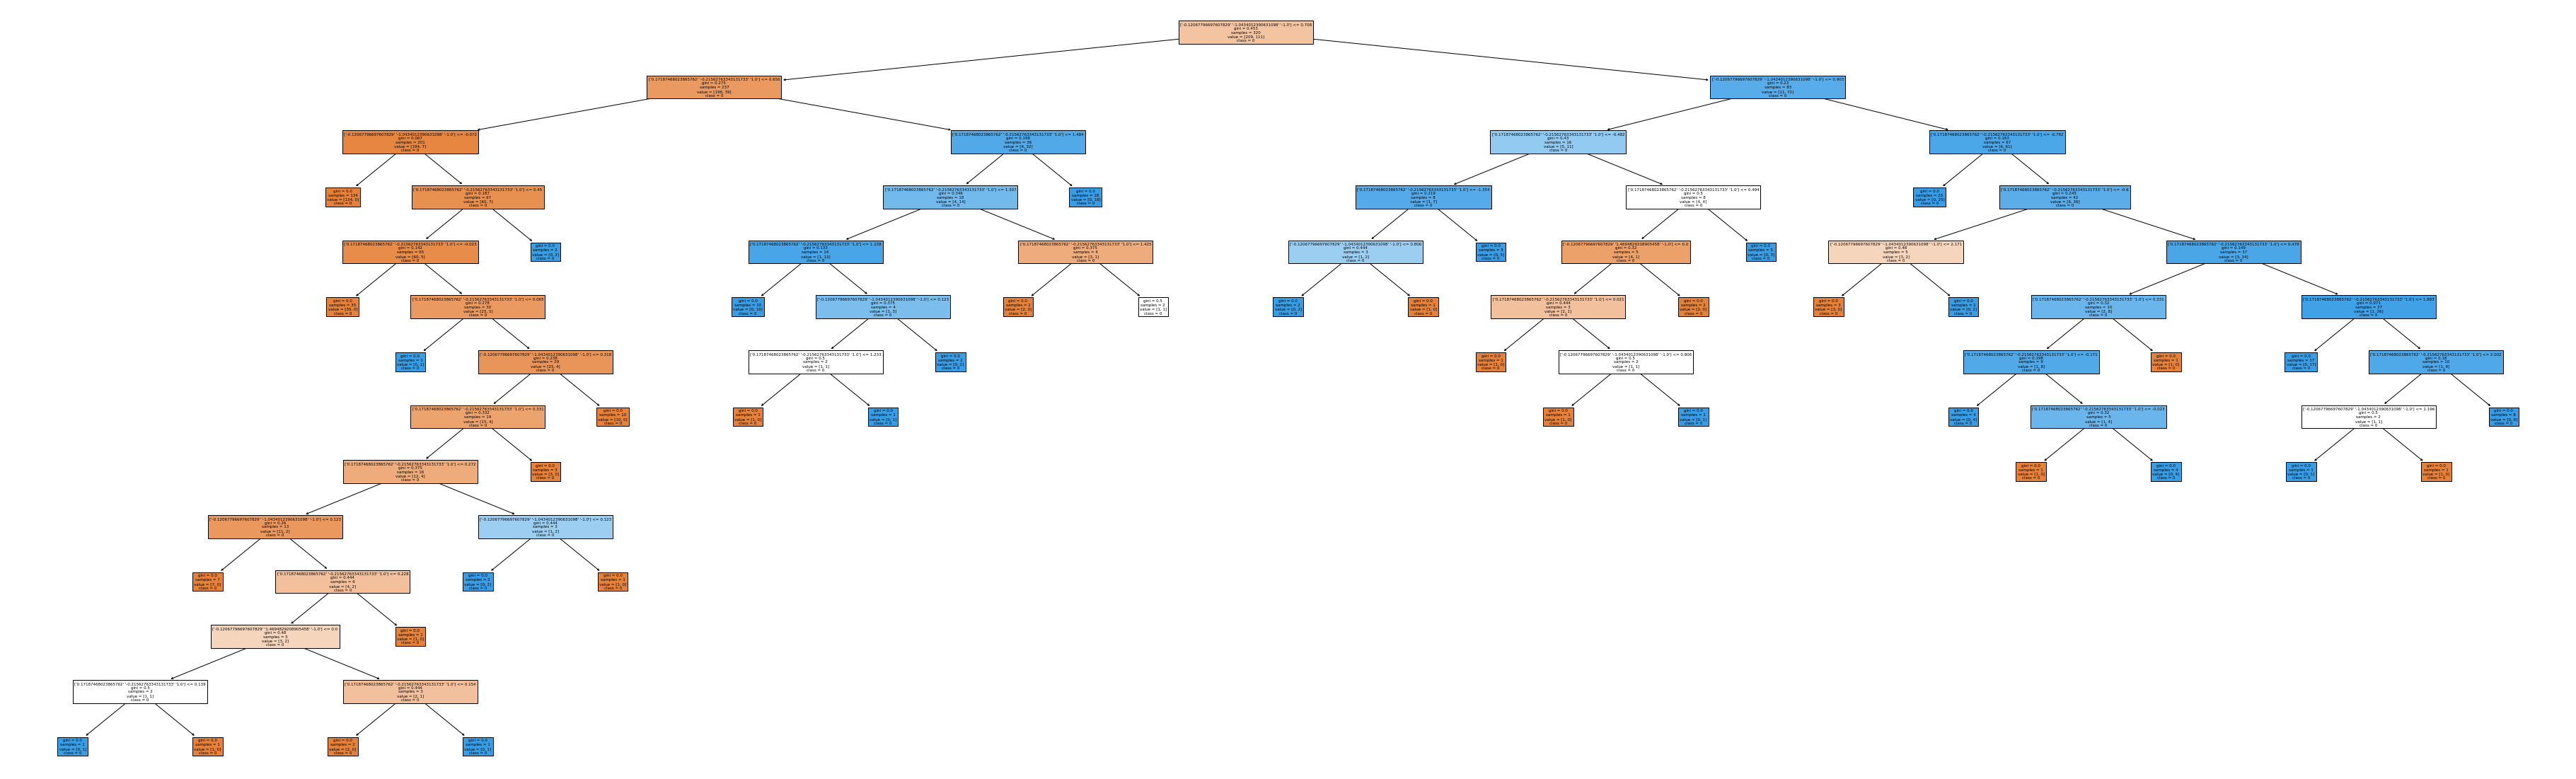

In [60]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(65,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names_test,  
                   class_names=target_names,
                   filled=True)